# Final Project

## 1. Scope the Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [2]:
# Read in the customer data
cus_data = pd.read_csv('maven_music_customers.csv')
cus_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [3]:
# Read in the listening history
list_hist = pd.read_excel('maven_music_listening_history.xlsx')
list_hist.head()


,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [4]:
# Hint: Where might you find listening history data beyond the ID's?


In [5]:
audio = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [6]:
# Read in the session data
session = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [7]:
# Check the data types

cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [8]:
list_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [9]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [10]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [11]:
# Convert objects to numeric and datetime fields


In [12]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [13]:
cus_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [14]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [15]:
cus_data['Member Since'] = pd.to_datetime(cus_data['Member Since'])
cus_data['Cancellation Date'] = pd.to_datetime(cus_data['Cancellation Date'])


In [16]:
cus_data['Subscription Rate'] = cus_data['Subscription Rate'].str.replace('$', '').astype('float')

In [17]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [18]:
list_hist.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [19]:
list_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [20]:
list_hist['Audio Type'].value_counts()

,count
Audio Type,
Song,463
Podcast,42


In [21]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [22]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [23]:
audio['ID'].value_counts()

,count
ID,
Song-101,1
Song-110,1
Podcast-204,1
Podcast-203,1
Podcast-202,1
Podcast-201,1
Song-112,1
Song-111,1
Song-109,1


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [24]:
# Look for NaN values in the data


In [25]:
cus_data.isna().sum()

,0
Customer ID,0
Customer Name,0
Email,0
Member Since,0
Subscription Plan,5
Subscription Rate,0
Discount?,23
Cancellation Date,17


In [26]:
cus_data['Subscription Rate'].value_counts(dropna = False)

,count
Subscription Rate,
2.99,17
7.99,7
9.99,5
99.99,1


In [27]:
cus_data['Subscription Plan'].fillna('Basic (Ads)', inplace=True)

In [28]:
cus_data['Discount?'].fillna('No', inplace=True)

In [29]:
cus_data['Subscription Rate'].value_counts()

,count
Subscription Rate,
2.99,17
7.99,7
9.99,5
99.99,1


In [30]:
cus_data['Subscription Rate'] = np.where(cus_data['Subscription Rate']==99.99, 9.99,cus_data['Subscription Rate'] )

#### ii. Inconsistent Text & Typos

In [31]:
# Look for inconsistent text & typos


In [32]:
cus_data.drop_duplicates(inplace=True)

#### iii. Duplicate Rows

In [33]:
# Look for duplicate rows


#### iv. Outliers

In [34]:
# Look for outliers


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [35]:
# Create a 'Cancelled' column
cus_data["cancelled"] = cus_data['Cancellation Date'].notna().astype('int')

In [36]:
# Create an updated 'Email' column without the Email: portion
cus_data['Email'] = cus_data['Email'].str.replace('Email: ', '')


In [37]:
cus_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [38]:
# How long were customers members before they cancelled?
cus_data['duration'] = cus_data['Cancellation Date'] - cus_data['Member Since']

In [39]:
# Cancellation rate for those who had a discount
cus_data['duration'].fillna(0, inplace = True)

In [40]:
# Cancellation rate for those who did not have a discountc
yes_dis = cus_data[cus_data['Discount?']=='Yes']

In [41]:
no_dis = cus_data[cus_data['Discount?']=='No']

In [42]:
no_dis['cancelled'].value_counts()

,count
cancelled,
0,16
1,7


In [43]:
# Visualize the cancellation rate for those with a discount vs those without a discount


<Axes: xlabel='cancelled', ylabel='count'>

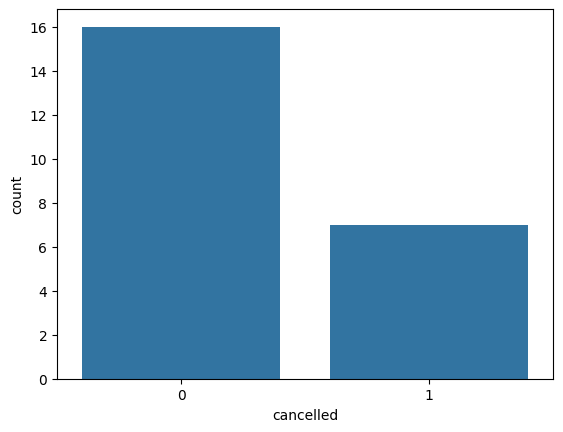

In [44]:
sns.countplot(data = no_dis, x='cancelled')

<Axes: xlabel='cancelled', ylabel='count'>

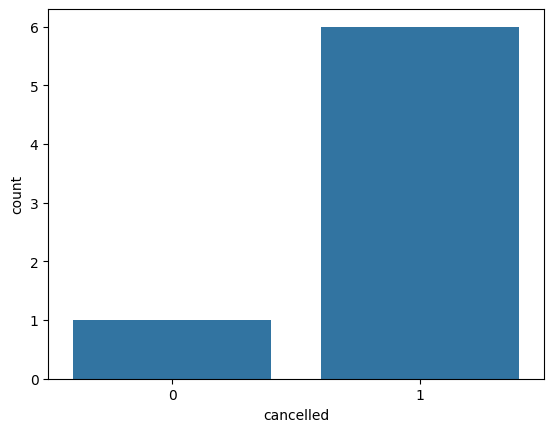

In [45]:
sns.countplot(data = yes_dis, x='cancelled')

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [46]:
# Split the ID in the audio data so the column can be joined with other tables
audio['ID'] = audio['ID'].str[-3:]

In [47]:
# Hint: Check the data type of Audio ID in the audio table
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [48]:
# The number of listening sessions that each customer had in the past 3 months
list_hist['Audio ID']= list_hist['Audio ID'].astype(str)
list_hist = pd.merge(list_hist, audio, how='left', left_on="Audio ID", right_on='ID')

In [49]:
list_hist.drop(['Audio ID'], axis=1, inplace=True)
list_hist.head()

,Customer ID,Session ID,Audio Order,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,Song,101,Dance All Night,Pop,1
1,5001,100520,2,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,Song,103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,Song,104,Glowing Hearts,Pop Music,10
4,5001,100520,5,Song,105,Pop Rocks,Pop Music,52


<Axes: ylabel='Frequency'>

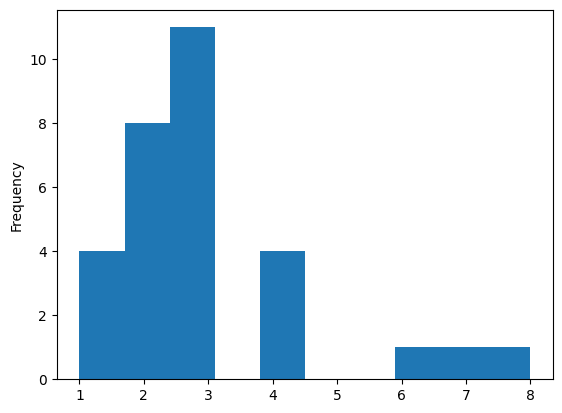

In [50]:
list_hist.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [51]:
# The most popular genres that customers listened to
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [52]:
list_hist['Genre'].value_counts()

,count
Genre,
Pop Music,167
Pop,100
Hip Hop,88
Country,68
Jazz,48
Comedy,19
True Crime,15


In [53]:
list_hist.Genre = np.where(list_hist['Genre'] == 'Pop Music', 'Pop', list_hist['Genre'])

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [54]:
cus_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,cancelled,duration
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,80 days 00:00:00
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0,0


In [55]:
cus_data['Discount?'] = np.where(cus_data['Discount?']== 'Yes', 1, 0)

In [56]:
# Create a dataframe ready for modeling
model_df = cus_data[['Customer ID', 'cancelled','Discount?']]
model_df.head()

,Customer ID,cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [57]:
# Calculate the number of listening sessions for each customer
num_session = list_hist.groupby('Customer ID')['Session ID'].nunique().rename('Number of session').to_frame().reset_index()
num_session.head()

,Customer ID,Number of session
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [58]:
model_df = model_df.merge(num_session, how='left', on='Customer ID')
model_df.head()

,Customer ID,cancelled,Discount?,Number of session
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


<Axes: xlabel='Genre', ylabel='count'>

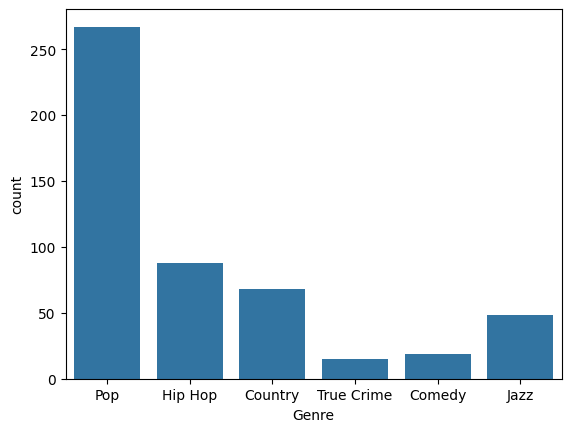

In [64]:
sns.countplot(data = list_hist, x= "Genre")

<Axes: xlabel='Audio Type', ylabel='count'>

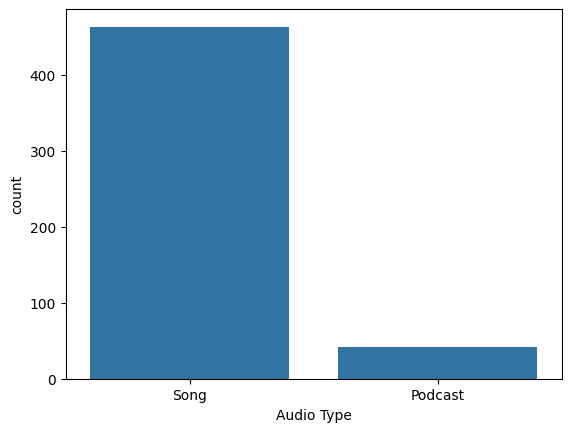

In [97]:
sns.countplot(data = list_hist, x= "Audio Type")

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
encoder = OneHotEncoder(sparse=False, drop=None)

In [67]:
encoded_data = encoder.fit_transform(list_hist[['Genre']])

In [74]:
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [75]:
df_encoded.head()

,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
genre = pd.concat([list_hist['Customer ID'], df_encoded], axis=1)

genre.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime
0,5001,0.0,0.0,0.0,0.0,1.0,0.0
1,5001,0.0,0.0,0.0,0.0,1.0,0.0
2,5001,0.0,0.0,0.0,0.0,1.0,0.0
3,5001,0.0,0.0,0.0,0.0,1.0,0.0
4,5001,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
genre = genre.groupby('Customer ID').sum().reset_index()
genre.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime
0,5001,0.0,0.0,26.0,0.0,34.0,0.0
1,5002,0.0,22.0,0.0,0.0,0.0,0.0
2,5004,0.0,0.0,0.0,0.0,9.0,0.0
3,5267,0.0,0.0,22.0,0.0,23.0,0.0
4,5338,0.0,18.0,0.0,0.0,0.0,0.0


In [85]:
total_audio = list_hist.groupby('Customer ID')['ID'].count().rename('Total Audio').to_frame().reset_index()

total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [87]:
df_audio = genre.merge(total_audio, how='left', on="Customer ID")
df_audio.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime,Total Audio
0,5001,0.0,0.0,26.0,0.0,34.0,0.0,60
1,5002,0.0,22.0,0.0,0.0,0.0,0.0,22
2,5004,0.0,0.0,0.0,0.0,9.0,0.0,9
3,5267,0.0,0.0,22.0,0.0,23.0,0.0,45
4,5338,0.0,18.0,0.0,0.0,0.0,0.0,18


In [100]:
df_audio['percent podcast'] = ((df_audio['Genre_Comedy']+df_audio['Genre_True Crime'])/df_audio['Total Audio'])* 100
df_audio.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime,Total Audio,percent song,percent podcast
0,5001,0.0,0.0,26.0,0.0,34.0,0.0,60,100.0,0.0
1,5002,0.0,22.0,0.0,0.0,0.0,0.0,22,100.0,0.0
2,5004,0.0,0.0,0.0,0.0,9.0,0.0,9,100.0,0.0
3,5267,0.0,0.0,22.0,0.0,23.0,0.0,45,100.0,0.0
4,5338,0.0,18.0,0.0,0.0,0.0,0.0,18,100.0,0.0


In [98]:
df_audio['percent song'] = ((df_audio['Genre_Country']+df_audio['Genre_Hip Hop']+df_audio['Genre_Jazz']+df_audio['Genre_Pop'])/df_audio['Total Audio'])* 100


df_audio.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime,Total Audio,percent podcast,percent song
0,5001,0.0,0.0,26.0,0.0,34.0,0.0,60,100.0,100.0
1,5002,0.0,22.0,0.0,0.0,0.0,0.0,22,100.0,100.0
2,5004,0.0,0.0,0.0,0.0,9.0,0.0,9,100.0,100.0
3,5267,0.0,0.0,22.0,0.0,23.0,0.0,45,100.0,100.0
4,5338,0.0,18.0,0.0,0.0,0.0,0.0,18,100.0,100.0


In [101]:
df_audio.head()

,Customer ID,Genre_Comedy,Genre_Country,Genre_Hip Hop,Genre_Jazz,Genre_Pop,Genre_True Crime,Total Audio,percent song,percent podcast
0,5001,0.0,0.0,26.0,0.0,34.0,0.0,60,100.0,0.0
1,5002,0.0,22.0,0.0,0.0,0.0,0.0,22,100.0,0.0
2,5004,0.0,0.0,0.0,0.0,9.0,0.0,9,100.0,0.0
3,5267,0.0,0.0,22.0,0.0,23.0,0.0,45,100.0,0.0
4,5338,0.0,18.0,0.0,0.0,0.0,0.0,18,100.0,0.0


In [102]:
model_df['percent podcast'] = ((df_audio['Genre_Comedy']+df_audio['Genre_True Crime'])/df_audio['Total Audio'])* 100
model_df.head()

,Customer ID,cancelled,Discount?,Number of session,percent podcast
0,5001,0,0,8,0.0
1,5002,0,0,4,0.0
2,5004,1,0,1,0.0
3,5267,0,0,7,0.0
4,5338,0,0,4,0.0


In [103]:
model_df['percent song'] = ((df_audio['Genre_Country']+df_audio['Genre_Hip Hop']+df_audio['Genre_Jazz']+df_audio['Genre_Pop'])/df_audio['Total Audio'])* 100
model_df.head()

,Customer ID,cancelled,Discount?,Number of session,percent podcast,percent song
0,5001,0,0,8,0.0,100.0
1,5002,0,0,4,0.0,100.0
2,5004,1,0,1,0.0,100.0
3,5267,0,0,7,0.0,100.0
4,5338,0,0,4,0.0,100.0


<Axes: xlabel='percent podcast', ylabel='Count'>

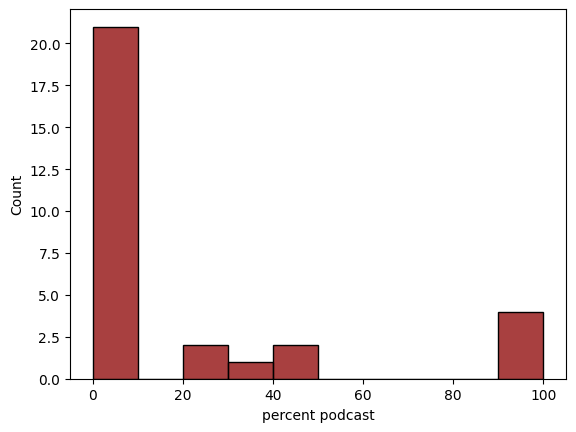

In [110]:
sns.histplot(model_df["percent podcast"], color = "darkred", bins=10)

Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

<Axes: >

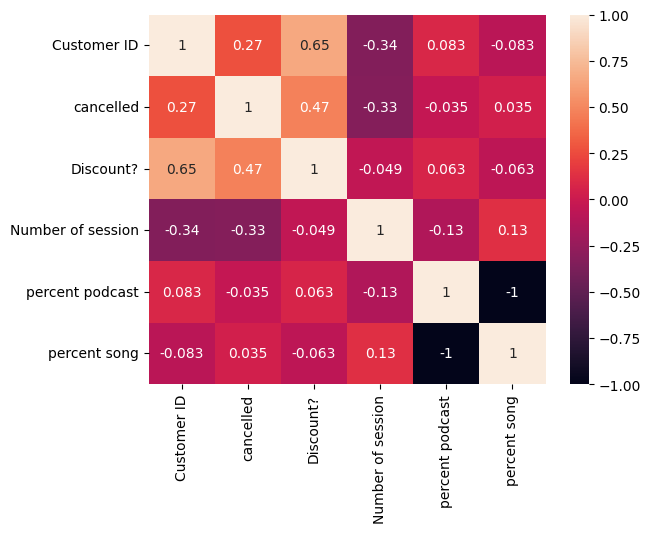

In [112]:
sns.heatmap(model_df.corr(), annot=True)

<Axes: xlabel='cancelled', ylabel='count'>

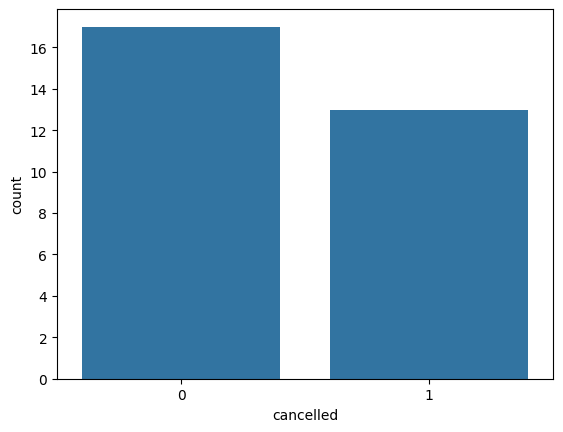

In [118]:
sns.countplot(data=model_df, x="cancelled")

**MODELLING**

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x = model_df.drop(['cancelled', "Customer ID"], axis=1)
y = model_df['cancelled']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr_model = LogisticRegression()

In [129]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [130]:
y_pred = lr_model.predict(x_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.00      0.00      0.00         5

    accuracy                           0.33         9
   macro avg       0.19      0.38      0.25         9
weighted avg       0.17      0.33      0.22         9



In [132]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [133]:
cf_matrix

array([[3, 1],
       [5, 0]])